### Let's import the data and some key libraries to analyze reviews with respect to time

In [1]:
import google.cloud.bigquery as bq
import pandas as pd
import seaborn as sns

In [2]:
client = bq.Client.from_service_account_json(r"C:\Users\HYZ7C\Desktop\Amazon Kaggle\Amazon Fine Food Reviews\service account\composite-cable-267902-437712ebc1d4.json")

In [3]:
df = client.query("""
SELECT
    Id,
    ProductId,
    UserId,
    Score, 
    DATE(TIMESTAMP_SECONDS(Time)) as Date
FROM `composite-cable-267902.fine_food.Reviews`
    """).to_dataframe()

In [4]:
df.head()

,Id,ProductId,UserId,Score,Date
0,440486,B002ZOCEMG,A1LIP0F4R542OQ,1,2012-10-26
1,84077,B000Y0M2MA,A3F6UPPU8W8J0U,1,2011-08-18
2,103098,B001E5E2RM,A2FN0D3N07O65V,1,2011-10-25
3,255627,B001MVDGIY,A2MQFVHD8LHIGY,1,2010-10-22
4,184113,B00764BRS2,AOJ311MIWIV9G,1,2012-03-27


In [5]:
df_by_year = df
df_by_year.Date = df_by_year.Date.apply(lambda x: str(x))

In [6]:
df_by_year['Year'] = df_by_year.Date
df_by_year['Year'] = df_by_year['Year'].apply(lambda x: x[:-6])
df_by_year.sort_values(by='Year')

,Id,ProductId,UserId,Score,Date,Year
336360,150524,0006641040,ACITT7DI6IDDL,5,1999-10-08,1999
338063,451856,B00004CXX9,AIUWLEQ1ADEG5,5,1999-12-02,1999
492654,150501,0006641040,AJ46FKXOVC7NR,5,1999-10-25,1999
489522,374359,B00004CI84,A344SMIA5JECGM,5,1999-12-06,1999
489523,451878,B00004CXX9,A344SMIA5JECGM,5,1999-12-06,1999
489524,230285,B00004RYGX,A344SMIA5JECGM,5,1999-12-06,1999
505926,374400,B00004CI84,A2DEE7F9XKP3ZR,5,2000-06-03,2000
564191,149768,B00004S1C5,A7P76IGRZZBFJ,5,2000-12-05,2000
485666,230347,B00004RYGX,A1FJOY14X3MUHE,5,2000-08-15,2000
419723,451902,B00004CXX9,A34NBH479RB0E,5,2000-12-19,2000


In [7]:
df_by_year.Year.describe()

count     568454
unique        14
top         2012
freq      198659
Name: Year, dtype: object

### Let's do a boxplot of reviews on Score vs. Year

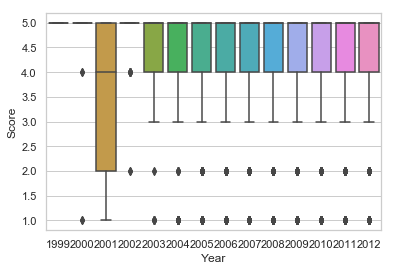

In [8]:
sns.set(style='whitegrid')
score_v_year = sns.boxplot(x='Year', y='Score', data=df_by_year)

### It appears that beyond 2003, reviews are mostly uniform. The spread of data before 2003 varies wildly, but is also relatively sparse. This will be demonstrated later in the notebook. Let's inspect the data before 2003 to see why it is so different from the rest of the data.

In [9]:
print("Number of Scores in 1999: {} Reviews".format(df_by_year[df_by_year.Year == '1999'].Score.count()))
print("Number of Scores in 1999 that were rated 5 out of 5: {} Reviews".format(df_by_year[(df_by_year.Year == '1999') & (df_by_year.Score == 5)].Score.count()))

Number of Scores in 1999: 6 Reviews
Number of Scores in 1999 that were rated 5 out of 5: 6 Reviews


In [10]:
df_by_year[(df_by_year.Year == '1999') & (df_by_year.Score == 5)]

,Id,ProductId,UserId,Score,Date,Year
336360,150524,0006641040,ACITT7DI6IDDL,5,1999-10-08,1999
338063,451856,B00004CXX9,AIUWLEQ1ADEG5,5,1999-12-02,1999
489522,374359,B00004CI84,A344SMIA5JECGM,5,1999-12-06,1999
489523,451878,B00004CXX9,A344SMIA5JECGM,5,1999-12-06,1999
489524,230285,B00004RYGX,A344SMIA5JECGM,5,1999-12-06,1999
492654,150501,0006641040,AJ46FKXOVC7NR,5,1999-10-25,1999


In [11]:
df[df.UserId == 'AIUWLEQ1ADEG5'].describe()

,Id,Score
count,1.0,1.0
mean,451856.0,5.0
std,NaN,NaN
min,451856.0,5.0
25%,451856.0,5.0
50%,451856.0,5.0
75%,451856.0,5.0
max,451856.0,5.0


In [12]:
df[df.ProductId == 'B00004CXX9'].describe()

,Id,Score
count,195.000000,195.000000
mean,451885.000000,4.405128
std,56.435804,1.072128
min,451788.000000,1.000000
25%,451836.500000,4.000000
50%,451885.000000,5.000000
75%,451933.500000,5.000000
max,451982.000000,5.000000


In [13]:
df_by_year[df_by_year['Year'] == '2001'].describe()

,Id,Score
count,13.000000,13.000000
mean,289977.692308,3.538462
std,125540.162479,1.713446
min,149790.000000,1.000000
25%,150500.000000,2.000000
50%,230375.000000,4.000000
75%,374449.000000,5.000000
max,451976.000000,5.000000


In [14]:
df_by_year[df_by_year['Year'] >= '2003'].describe()

,Id,Score
count,568330.000000,568330.000000
mean,284222.459108,4.183117
std,164106.557695,1.310481
min,1.000000,1.000000
25%,142087.250000,4.000000
50%,284222.500000,5.000000
75%,426339.750000,5.000000
max,568454.000000,5.000000


In [15]:
df_by_year.describe()

,Id,Score
count,568454.000000,568454.000000
mean,284227.500000,4.183199
std,164098.679298,1.310436
min,1.000000,1.000000
25%,142114.250000,4.000000
50%,284227.500000,5.000000
75%,426340.750000,5.000000
max,568454.000000,5.000000


### conclusion: Data from 1999 to 2002 is not significant enough to impact overall model (e.g. 1999 total reviews are only 5, all scoring their products 5 stars). Let's try to evaluate the data based on month. Perhaps we can find some insight over time and increase resolution by month to identify shopping patterns (e.g. frantic shopping during Xmas and Black Friday).


In [17]:
df_by_year['Month'] = df_by_year.Date
df_by_year['Month'] = df_by_year['Month'].apply(lambda x: str(x))
df_by_year['Month'] = df_by_year['Month'].apply(lambda x: x[:-3])
df_by_year['Month'] = df_by_year['Month'].apply(lambda x: x[5:])
df_by_year.sort_values(by='Month')

,Id,ProductId,UserId,Score,Date,Year,Month
217339,47226,B0029O10P4,A14ELYDYX7LOFQ,5,2011-01-28,2011,01
135788,504812,B000H241DS,A3BU7MPWOAIQBL,4,2012-01-09,2012,01
46662,447794,B002GZIEP0,A17BXN9X0G4U3Q,1,2011-01-20,2011,01
46663,484706,B0002DHNLE,A2QQ5043U6WPZ2,1,2010-01-21,2010,01
360496,346881,B0026PIQ5S,A2O6VOHNB0IJ2U,5,2011-01-30,2011,01
499249,187183,B0014GZD56,A2FEXGU44TJOBL,5,2011-01-09,2011,01
499247,318384,B00473ST5O,A304H4OEK00E0H,5,2011-01-16,2011,01
360508,347522,B001N879WA,A8O12DCHIADYU,5,2012-01-03,2012,01
360510,101859,B000DZH1D6,A2O2NDC09W0SQ5,5,2012-01-15,2012,01
499241,72265,B002FYJTCE,A1XVKAMXSOW8ZV,5,2011-01-17,2011,01


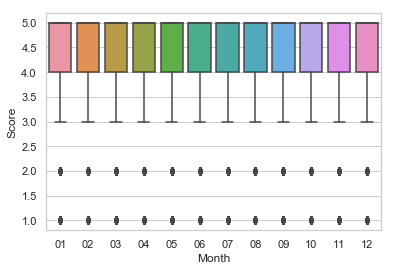

In [18]:
sns.set(style='whitegrid')
score_v_month = sns.boxplot(x='Month', y='Score', data=df_by_year)

In [19]:
print('Standard Deviation overall is: {}'.format(df_by_year.Score.std()))
print('Standard Deviation for December is: {}'.format(df_by_year[df_by_year['Month'] == '12'].Score.std()))
print('Standard Deviation for June is: {}'.format(df_by_year[df_by_year['Month'] == '06'].Score.std()))

Standard Deviation overall is: 1.3104360248350622
Standard Deviation for December is: 1.362486484251093
Standard Deviation for June is: 1.3129436146356952


In [20]:
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
month_std = [df_by_year[df_by_year['Month'] == i].Score.std() for i in months]

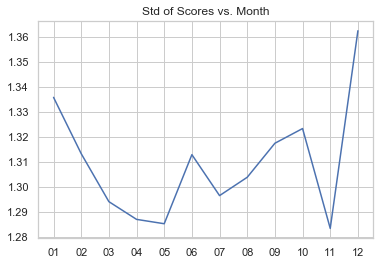

In [21]:
Std_by_Month_chart = sns.lineplot(x=months,
                         y=month_std, 
                         ).set_title('Std of Scores vs. Month')

### Conclusion: Scores don't appear to fluctuate based on month compared to overall scores. The hypothesis was that with shopping seasons (e.g. Xmas in December, Black Friday in November, etc.) there would be an uptick in variance as uncommon or newcoming consumers purchase items they don't typically purchase, and therefore the spread of Scores would be larger compared to the average std. However, the standard deviation deviates a mere +0.05 from overall standard deviation in December (the largest std).

### Strangely enough, November (e.g. Thanksgiving, Black Friday) appear to deviate less than overall standard deviation by -0.03. While not a strong measure of variation, it possibly warrants further investigation as it suggests data for November from 1999 to 2012  is more uniform compared to data overall. 

### We can also try a lineplot for standard deviation based on year AND month to see if over time standard deviation changes as Amazon becomes an internet phenomena

In [22]:
df_by_year['Year-Month'] = df_by_year.Date
df_by_year['Year-Month'] = df_by_year['Year-Month'].apply(lambda x: str(x))
df_by_year['Year-Month'] = df_by_year['Year-Month'].apply(lambda x: x[:-3])
df_by_year.sort_values(by='Year-Month')

,Id,ProductId,UserId,Score,Date,Year,Month,Year-Month
492654,150501,0006641040,AJ46FKXOVC7NR,5,1999-10-25,1999,10,1999-10
336360,150524,0006641040,ACITT7DI6IDDL,5,1999-10-08,1999,10,1999-10
489522,374359,B00004CI84,A344SMIA5JECGM,5,1999-12-06,1999,12,1999-12
489524,230285,B00004RYGX,A344SMIA5JECGM,5,1999-12-06,1999,12,1999-12
338063,451856,B00004CXX9,AIUWLEQ1ADEG5,5,1999-12-02,1999,12,1999-12
489523,451878,B00004CXX9,A344SMIA5JECGM,5,1999-12-06,1999,12,1999-12
50753,230269,B00004RYGX,A1B2IZU1JLZA6,1,2000-01-19,2000,01,2000-01
50752,374343,B00004CI84,A1B2IZU1JLZA6,1,2000-01-19,2000,01,2000-01
293933,76882,B00002N8SM,A32DW342WBJ6BX,5,2000-01-24,2000,01,2000-01
483570,451949,B00004CXX9,A1048CYU0OV4O8,5,2000-01-09,2000,01,2000-01


In [23]:
years = []
for i in range(1999,2013):
    years.append(str(i))

In [24]:
year_month_std = []
for year in years:
    for month in months:
        year_month_std.append(df_by_year[df_by_year['Year-Month'] == (year + '-' + month)].Score.std())

In [25]:
year_month = []
for year in years:
    for month in months:
        year_month.append(year + '-' + month)

In [27]:
year_month_mean = []
for year in years:
    for month in months:
        year_month_mean.append(df_by_year[df_by_year['Year-Month'] == (year + '-' + month)].Score.mean())

In [42]:
year_month_count = []
for year in years:
    for month in months:
        year_month_count.append(df_by_year[df_by_year['Year-Month'] == (year + '-' + month)].Score.count())

In [45]:
print("Number of STDs calculated by Year-Month: {}".format(len(year_month_std)))
print("Number of Means calculated by Year-Month: {}".format(len(year_month_mean)))
print("Number of STDs calculated by Year-Month: {}".format(len(year_month_count)))

Number of STDs calculated by Year-Month: 168
Number of Means calculated by Year-Month: 168
Number of STDs calculated by Year-Month: 168


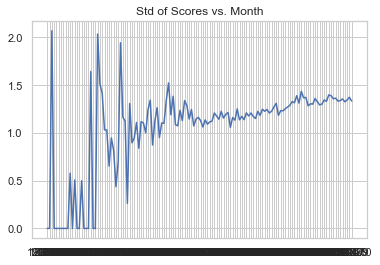

In [26]:
Std_by_Month_chart = sns.lineplot(x=year_month,
                         y=year_month_std, 
                         ).set_title('Std of Scores vs. Month')

### This doesn't look too good. Let's try to build an interactive plot with mean of Score, STD, and count for each Year-Month

In [31]:
year_month_round_mean = []
for num in year_month_mean:
    if pd.isnull(num):
        year_month_round_mean.append(0.0)
    else:
        year_month_round_mean.append(round(num,3))

In [28]:
year_month_round_std = []
for num in year_month_std:
    if pd.isnull(num):
        year_month_round_std.append(0.0)
    else:
        year_month_round_std.append(round(num, 3))


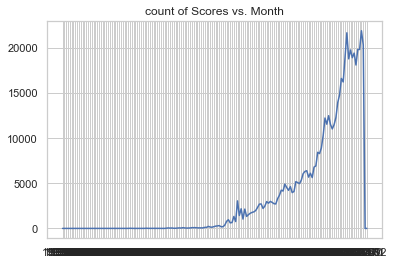

In [53]:
count_by_Month_chart = sns.lineplot(x=year_month,
                         y=year_month_count, 
                         ).set_title('count of Scores vs. Month')

In [73]:
from bokeh.layouts import gridplot
from bokeh.plotting import curdoc, figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool,WheelZoomTool, PanTool, ResetTool
import numpy as np

source = ColumnDataSource(data=dict(
    x=year_month, 
    y=year_month_round_std,
    y2=year_month_round_mean,
    y3=year_month_count
))

TOOLTIPS=[
     ('Year-Month', '@x'),
     ('Standard Deviation', '@y'),
     ('Mean', '@y2'),
     ('Count', '@y3')
]

##the scatter and line plot for STD and Mean
p = figure(x_range=year_month,
           tooltips=TOOLTIPS, toolbar_location="left",
           title="Mean / STD / Count of Scores vs. Month-Year"
          )

p.line(x='x', y='y2', source=source, legend='Mean', color = 'blue')
p.circle(x='x', y='y',source=source, legend='Standard Deviation', color = 'green')

p.xaxis.major_label_text_font_size = '0pt'
p.xaxis.axis_label = 'Year-Month'
p.legend.location = "top_left"
p.legend.click_policy="hide"

##the histogram for count (168 bins)
pv = figure(plot_width=p.plot_width, plot_height=p.plot_height, x_range=p.x_range,
           min_border=10, min_border_left=50, y_axis_location="right",
           tooltips=TOOLTIPS,toolbar_location="left")

pv.vbar(x='x', top='y3', source=source, width=0.9)

pv.xgrid.grid_line_color = None
pv.yaxis.major_label_orientation = np.pi/4
pv.background_fill_color = "#fafafa"
pv.xaxis.major_label_text_font_size = '0pt'
pv.xaxis.axis_label = 'Year-Month'

layout = gridplot([[p, pv]], merge_tools=False)


show(layout)

### Now, open the attached .html file to see the interactive plot in play!